# Term Project for CIS 3389
Program authored by Rowan Rollman and Joseph Valadez

In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import statistics
import requests
from time import *
from random import randint
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = 'http://mycatalog.txstate.edu/courses/'

page = requests.get(URL)
soup = bs(page.content, 'html.parser')

I want to loop through a bunch of the pages on this website, so the URL changes slightly everytime.
I also don't want the website to ban my IP address, so I need to add a sleep function to make sure this code sends requests at random times rather than constant.

In [3]:
things = soup.find('div',id='atozindex')
urls = []
for t in things.find_all('a'):
    urls.append(t.get('href'))


In [4]:
department = []
courses = []
credits = []
lectureHours = []
labHours = []
grademode = []
desc = []

count=1
for u in urls:
    clear_output(wait=True)
    
    r = requests.get(URL+u[9:])
    s = bs(r.content, 'html.parser')
    
    block = s.find_all(class_='courseblocktitle')
    for b in block:
        
        courses.append(b.get_text())
    
    creds = s.find_all(class_='credits')
    for c in creds:
        #need to split these on the period, and only pull the numbers (1st char)
        c = c.get_text()
        x = c.split(" ")
        credits.append(float(x[0].strip()))
        lectureHours.append(float(x[3].strip()))
        labHours.append(float(x[7].strip()))
        
    grades = s.find_all(class_='grademode')
    for g in grades:
        g = g.get_text()
        x = g.split(": ")
        grademode.append(x[1])
        
    descs = s.find_all(class_='courseblockdesc')
    for d in descs:
        desc.append(d.get_text())
        
    #this ensures that there's enough department labels when we eventually
    #put the lists together in a dataframe
    for x in range(0,len(block)):
        department.append(s.find(class_='page-title').get_text())
        
        
    print("Current progress: ",np.round(count/len(urls)*100,2),"%")
    count = count+1
    sleep(randint(2,3))

Current progress:  100.0 %


In [5]:
#Cleaning up courses array, mainly getting rid of the hidden character '\xa0'
#Then fixing the Aerospace Studies section to remove extra spaces
courses = list(map(lambda x: x.replace('\xa0', ' '), courses))
for c in range(len(courses)):
    if courses[c].startswith("A S"):
        courses[c] = courses[c].replace(' ','',1)
    if courses[c].startswith("B A"):
        courses[c] = courses[c].replace(' ','',1)

In [6]:
#Making sure everything is the same length so we can put it in a DataFrame
len(department), len(courses), len(credits), len(lectureHours), len(labHours), len(grademode), len(desc)


(6034, 6034, 6034, 6034, 6034, 6034, 6034)

In [7]:
data = {'Department':department,'Course':courses,'Credit Hours':credits,
       'Lecture Hours':lectureHours,'Lab Hours':labHours,'Grade Mode':grademode,'Description':desc}
d = pd.DataFrame(data)
d

,Department,Course,Credit Hours,Lecture Hours,Lab Hours,Grade Mode,Description
0,Accounting (ACC),ACC 2301. Accounting in Organizations and Soci...,3.0,3.0,0.0,Standard Letter,Introductory accounting course for non-busines...
1,Accounting (ACC),ACC 2325. Financial Analysis and Accounting.,3.0,3.0,0.0,Credit/No Credit,A study of financial statement analysis and ov...
2,Accounting (ACC),ACC 2361. Introduction to Financial Accounting.,3.0,3.0,0.0,Standard Letter,This course introduces financial accounting co...
3,Accounting (ACC),ACC 2362. Introduction to Managerial Accounting.,3.0,3.0,0.0,Standard Letter,This course provides an introduction to the us...
4,Accounting (ACC),ACC 3305. Financial Accounting and Reporting.,3.0,3.0,0.0,Standard Letter,This course expands upon financial accounting ...
...,...,...,...,...,...,...,...
6029,Women's Studies (WS),WS 3377. Realities of Women.,3.0,3.0,0.0,Standard Letter,"This course, one of two multidisciplinary team..."
6030,Women's Studies (WS),WS 4388. Independent Research in Women’s Studies.,3.0,3.0,0.0,Standard Letter,Independent study course open to advanced stud...
6031,Women's Studies (WS),WS 5376. Images of Women.,3.0,3.0,0.0,Standard Letter,"This course, one of two multidisciplinary team..."
6032,Women's Studies (WS),WS 5377. Realities of Women.,3.0,3.0,0.0,Standard Letter,"This course, one of two multidisciplinary team..."


In [8]:
print("There are",d['Department'].unique().size,"departments at Texas State")
print("There are",d['Course'].size,"classes offered at Texas State")

There are 121 departments at Texas State
There are 6034 classes offered at Texas State


In [9]:
d.info()
#Then we save the data to a csv file
d.to_csv('WebScrapingDataTermProject_group11.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Department     6034 non-null   object 
 1   Course         6034 non-null   object 
 2   Credit Hours   6034 non-null   float64
 3   Lecture Hours  6034 non-null   float64
 4   Lab Hours      6034 non-null   float64
 5   Grade Mode     6034 non-null   object 
 6   Description    6034 non-null   object 
dtypes: float64(3), object(4)
memory usage: 330.1+ KB


### Data Analysis

#### Questions
1. Which department has the most classes?
    * What percentage of all classes are in that department
        * For example, Accounting (ACC) has 30 classes, which is 0.5% of all classes at Texas State.
2. Within each department, what is the average number of lab hours?
    * Which department has the highest average number of lab hours?
3. Which department has the most upper level (5000-7000) classes?
4. Which department has the most Pass/Fail classes?

In [10]:
print(d['Department'].value_counts())
#Finding which department has the most classes
print("Department\tNumber of Classes")
print(d['Department'].value_counts().head(1))
#Doing percentages
num = d['Department'].value_counts().max()
count = d['Department'].count()
print()
print("Percent of classes at Texas State: %f%%"%((num/d['Department'].count())*100))

Biology (BIO)                        267
History (HIST)                       252
Theatre (TH)                         228
Honors (HON)                         214
Geography (GEO)                      210
                                    ... 
Political Science (POSI)               2
General Studies (GNST)                 2
Linguistics (LING)                     2
Nature and Heritage Tourism (NHT)      2
Health Professions (HP)                2
Name: Department, Length: 121, dtype: int64
Department	Number of Classes
Biology (BIO)    267
Name: Department, dtype: int64

Percent of classes at Texas State: 4.424925%


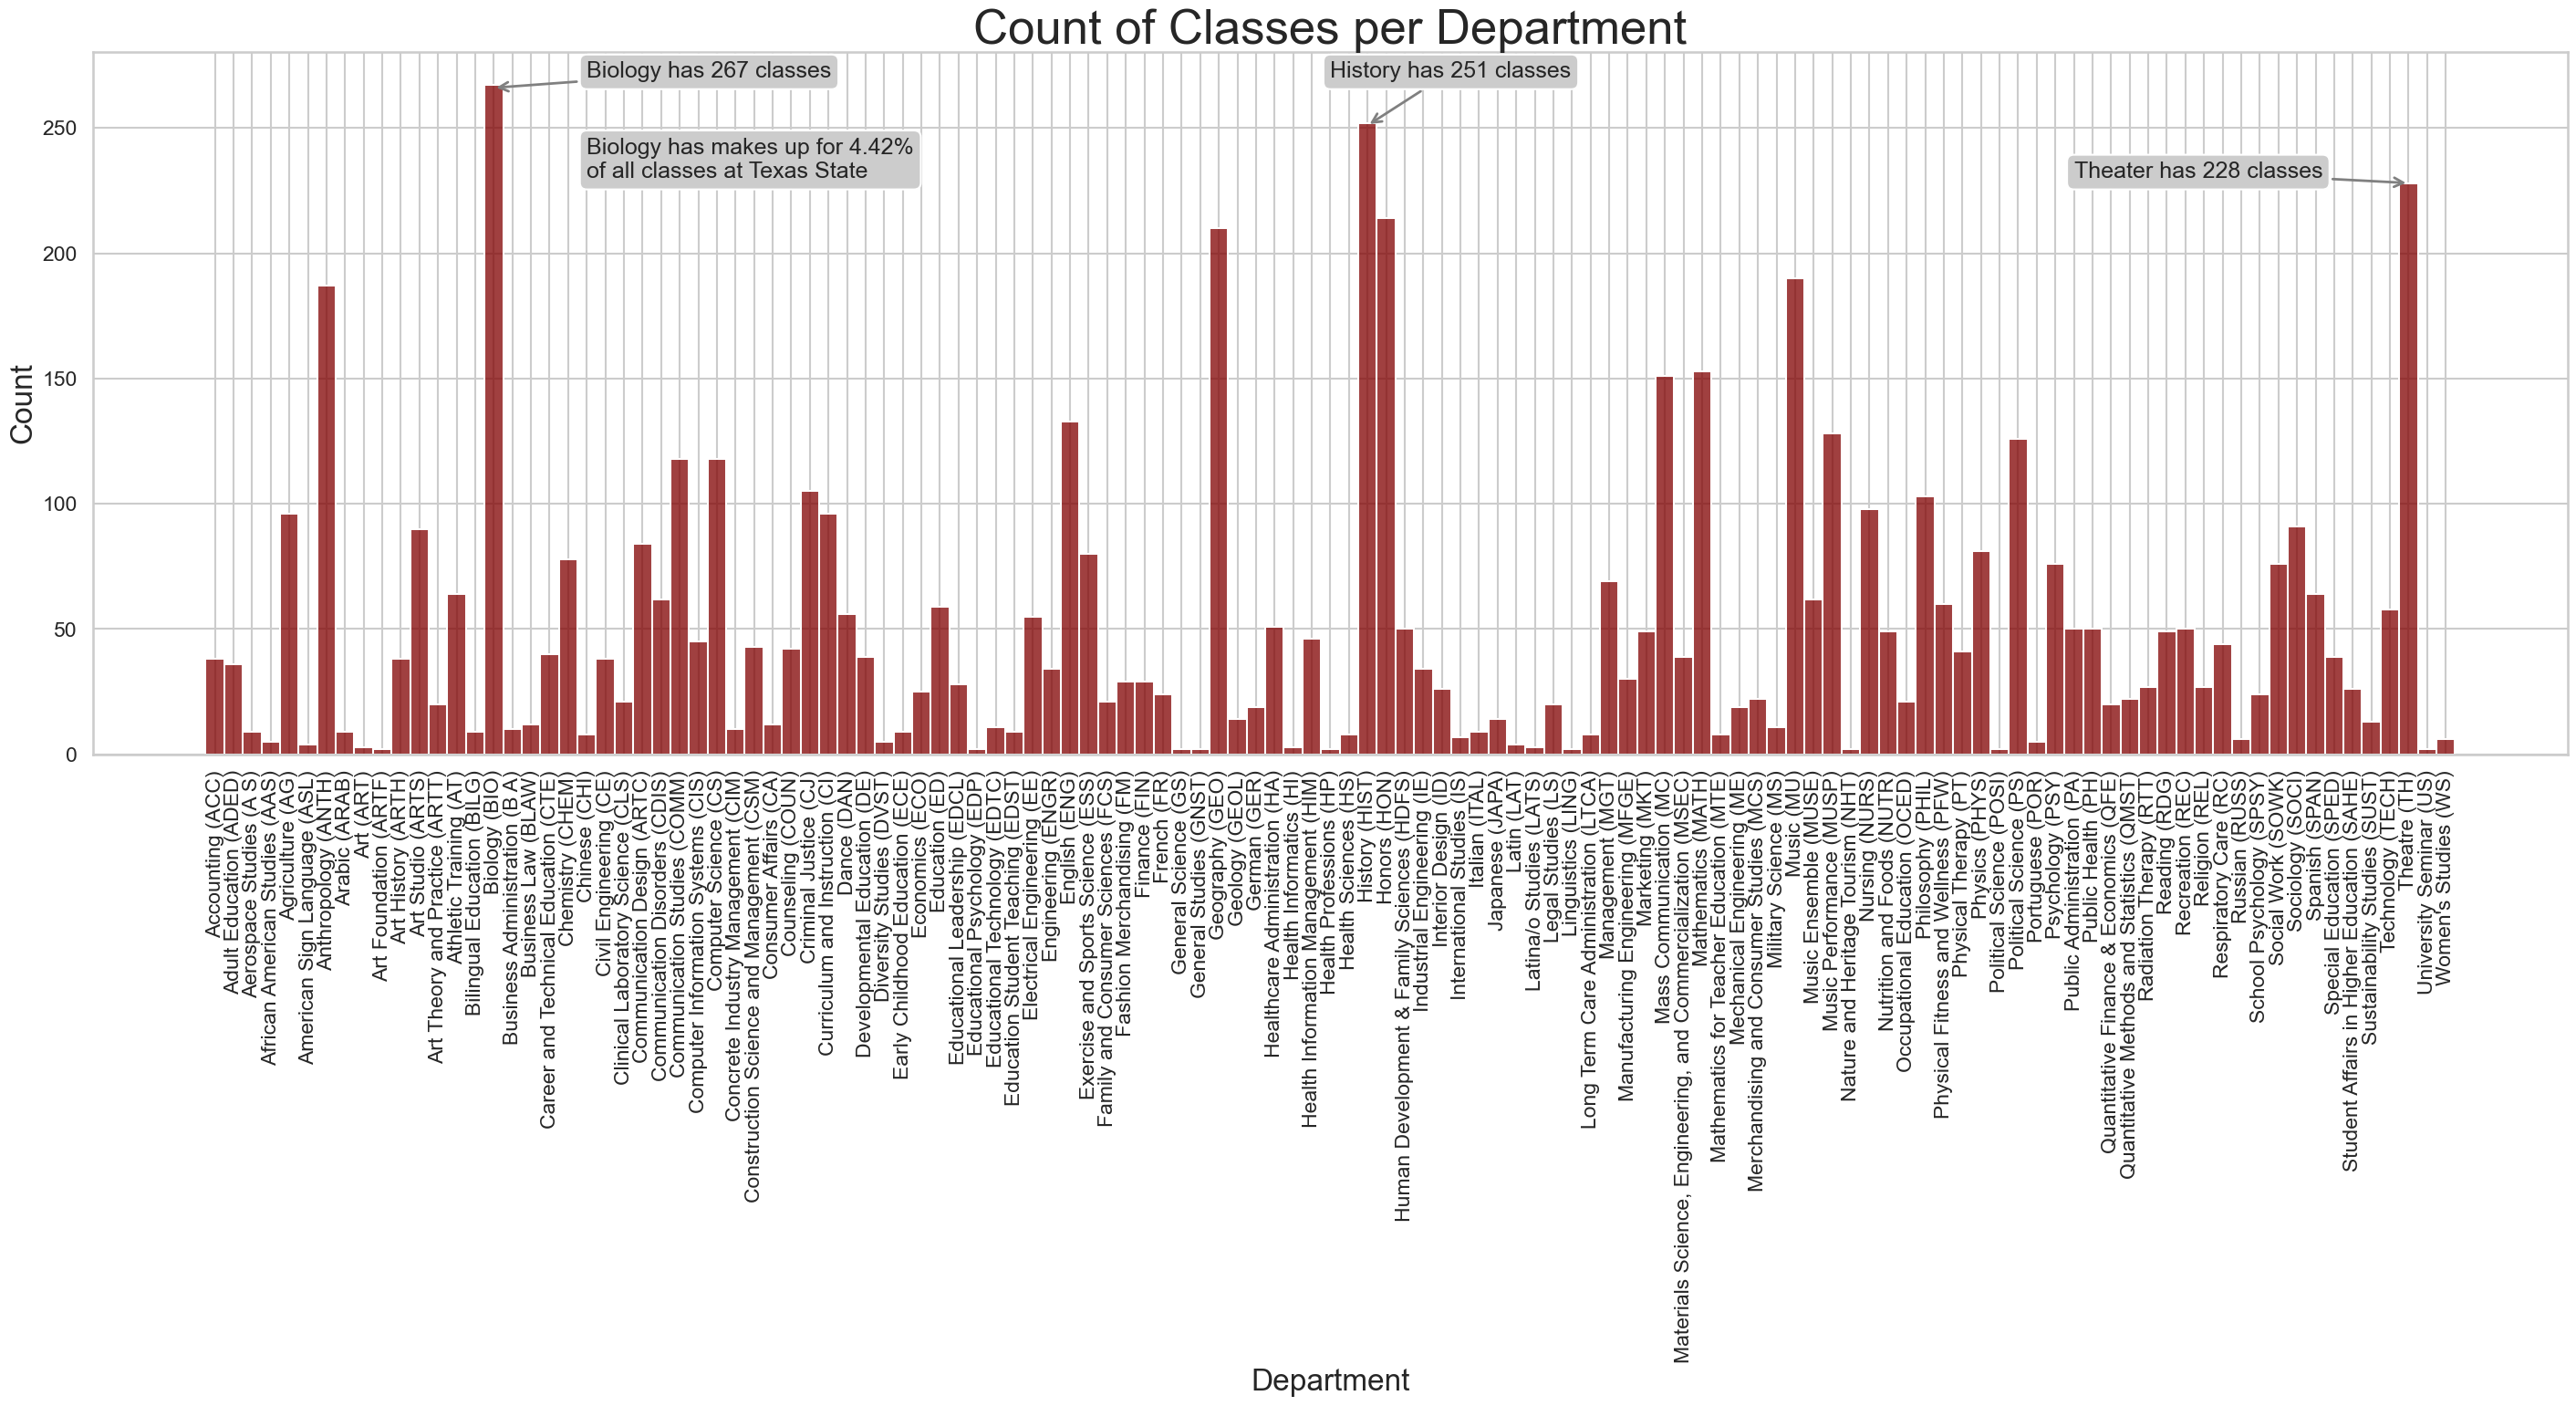

In [11]:
sns.set_theme(context="talk",style="whitegrid")

temp = d['Department'].value_counts()
plt.figure(figsize=(35,10))
ax = sns.histplot(data=d['Department'].value_counts(), x=d['Department'], color='maroon')
ax.annotate("Biology has 267 classes", xy=(15,266), xytext=(20, 270), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("History has 251 classes", xy=(62,251), xytext=(60, 270), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Theater has 228 classes", xy=(118,228), xytext=(100, 230), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Biology has makes up for 4.42%\nof all classes at Texas State", xy=(15,266), xytext=(20, 230), fontsize=18,
            bbox=dict(boxstyle="round", fc="0.8"))

plt.xticks(rotation=90)
plt.xlabel("Department",fontsize=24)
plt.ylabel("Count",fontsize=24)
plt.title("Count of Classes per Department", fontsize=38)
plt.savefig("CountClasses_PerDepartment.pdf", bbox_inches='tight')

In [12]:
print(d['Department'].value_counts().describe())
print("Median:",statistics.median(d['Department'].value_counts()))

count    121.000000
mean      49.867769
std       55.645147
min        2.000000
25%       10.000000
50%       34.000000
75%       62.000000
max      267.000000
Name: Department, dtype: float64
Median: 34


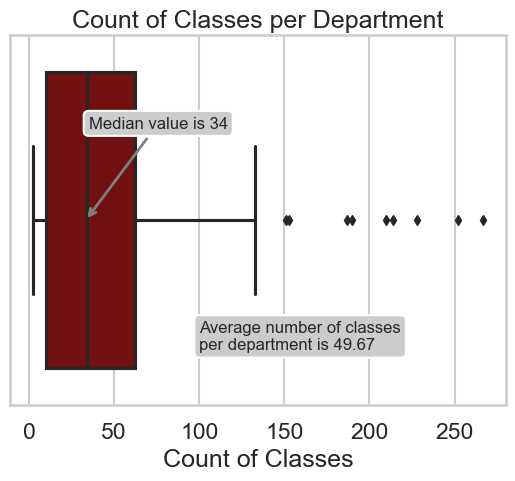

In [13]:
ax = sns.boxplot(x=d['Department'].value_counts(), color='maroon')

ax.annotate("Median value is 34", xy=(33.25,0), xytext=(35, -.25), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Average number of classes\nper department is 49.67", xy=(50,0), xytext=(100, .35), fontsize=12,
            bbox=dict(boxstyle="round", fc="0.8"))

plt.xlabel("Count of Classes")
plt.title("Count of Classes per Department")
plt.savefig("BoxPlot_ClassesPerDepartment.pdf", bbox_inches='tight')

In [14]:
#Finding average lab hours per department
storingMean = d.groupby(by='Department')['Lab Hours'].mean()
storingMean.to_csv("avgLabHours.csv", index=True)
#Which is the highest
print()
print("Department with the highest average lab hours")
print(storingMean.idxmax(), round(storingMean.max(),3))


Department with the highest average lab hours
Education Student Teaching (EDST) 33.333


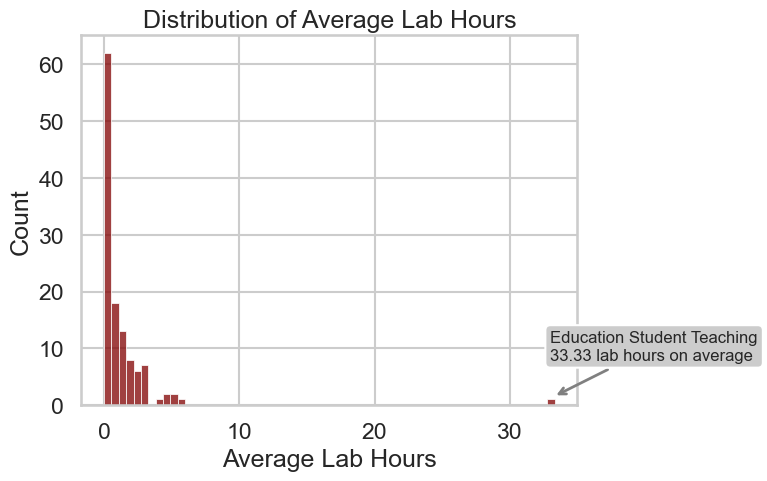

In [15]:
sns.set_theme(context="talk",style="whitegrid")

ax = sns.histplot(x=storingMean, color="maroon")
ax.annotate("Education Student Teaching\n33.33 lab hours on average", xy=(33.25, 1.5), xytext=(33, 8), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
plt.xlabel("Average Lab Hours")
plt.title("Distribution of Average Lab Hours")
plt.savefig("HistPlot_DistributionofLabHours.pdf", bbox_inches='tight')

Need to do some data slicing for q3
* Split each "course" into the 3 parts:
    * Abbreviation (CS)
    * Course number (1428)
    * The excess (course title, so "Foundations of Computer Science 1")
* Keeping track of what department the program is in, count how many of the courses start with 5-7
* Output the info, can keep it stored in arrays as needed

In [16]:
print("There are",d['Department'].unique().size,"departments.")
deptList = d['Department'].unique()
listIndex=0
countList=[0 for i in range(d['Department'].unique().size)]

for x in range(d['Course'].size):
    if deptList[listIndex]==d['Department'][x]:
        vals = d['Course'][x].split(' ')
        if int(vals[1][0])>4:
            countList[listIndex] += 1
    else:
        listIndex += 1
hl = {'Department':d['Department'].unique(),'Count of Higher Level Classes':countList}
higherLevel = pd.DataFrame(hl)
higherLevel

There are 121 departments.


,Department,Count of Higher Level Classes
0,Accounting (ACC),25
1,Adult Education (ADED),35
2,Aerospace Studies (A S),0
3,African American Studies (AAS),0
4,Agriculture (AG),33
...,...,...
116,Sustainability Studies (SUST),12
117,Technology (TECH),24
118,Theatre (TH),72
119,University Seminar (US),0


In [17]:
higherLevel.sort_values(by=['Count of Higher Level Classes'], ascending=False)

,Department,Count of Higher Level Classes
15,Biology (BIO),153
54,Geography (GEO),133
62,History (HIST),107
6,Anthropology (ANTH),104
80,Mathematics (MATH),102
...,...,...
53,General Studies (GNST),0
96,Political Science (POSI),0
52,General Science (GS),0
98,Portuguese (POR),0


As you can see in the above table, Biology has the most upper level courses (153).

In [18]:
print("There are",higherLevel['Count of Higher Level Classes'].isin([0]).sum(),"departments that have 0 upper level classes.")

There are 35 departments that have 0 upper level classes.


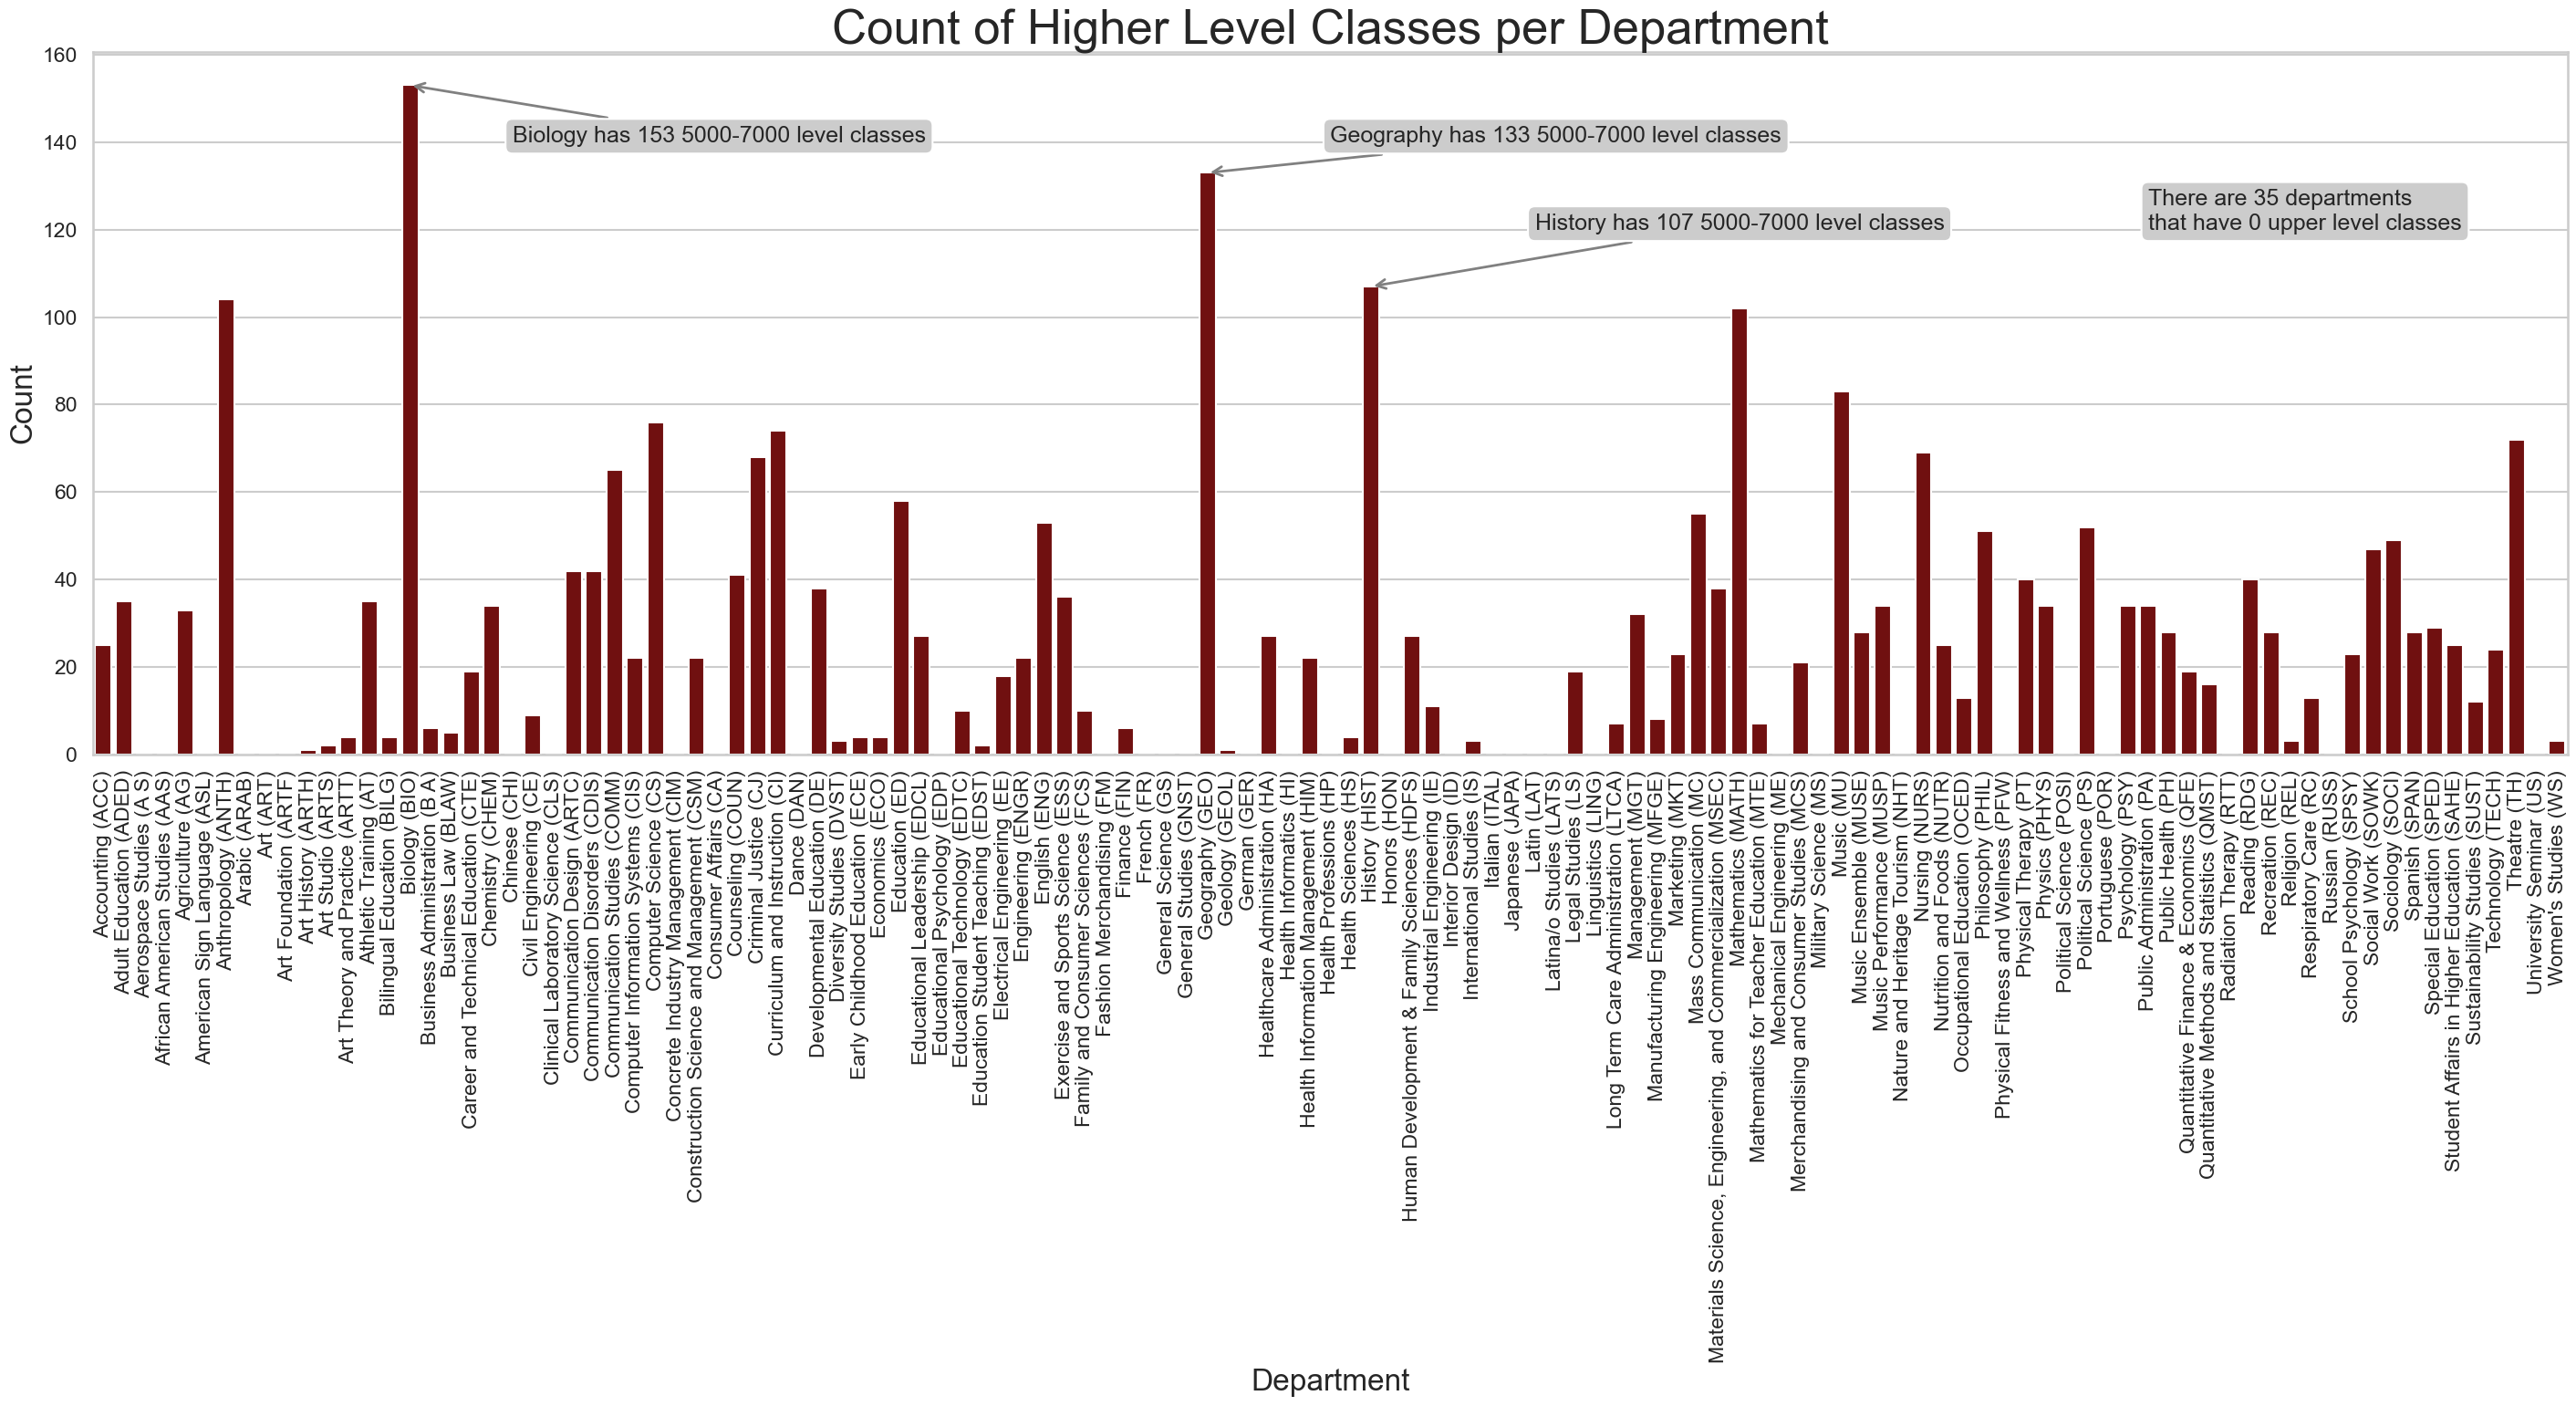

In [19]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x=higherLevel['Department'],y=higherLevel['Count of Higher Level Classes'], color="maroon")
ax.annotate("Biology has 153 5000-7000 level classes", xy=(15, 153), xytext=(20, 140), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Geography has 133 5000-7000 level classes", xy=(54, 133), xytext=(60, 140), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("History has 107 5000-7000 level classes", xy=(62, 107), xytext=(70, 120), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("There are 35 departments\nthat have 0 upper level classes",xy=(110,120), xytext=(100, 120), fontsize=18,
            bbox=dict(boxstyle="round", fc="0.8"))

plt.title("Count of Higher Level Classes per Department", fontsize=38)
plt.xticks(rotation=90)
plt.xlabel("Department",fontsize=24)
plt.ylabel("Count",fontsize=24)
plt.savefig("Count_HigherLevelClasses.pdf", bbox_inches='tight')

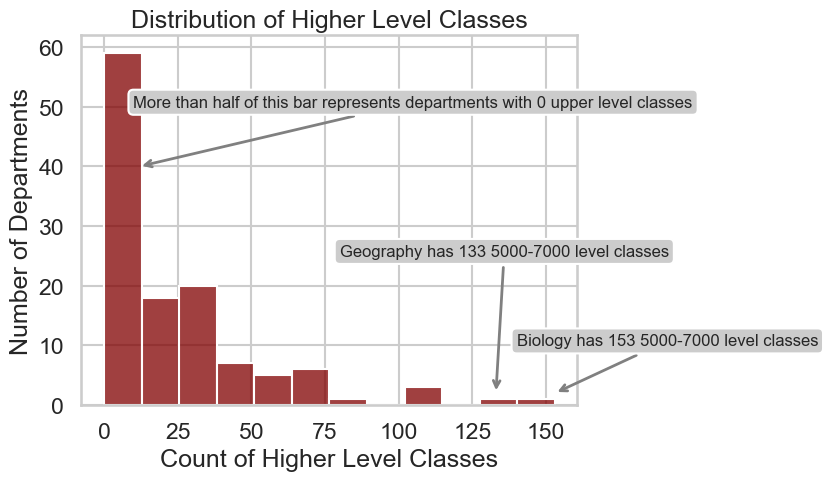

In [20]:
ax = sns.histplot(x=higherLevel['Count of Higher Level Classes'], color="maroon")
ax.annotate("Biology has 153 5000-7000 level classes", xy=(153, 2), xytext=(140, 10), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Geography has 133 5000-7000 level classes", xy=(133, 2), xytext=(80, 25), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("More than half of this bar represents departments with 0 upper level classes", xy=(12, 40), xytext=(10, 50), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
plt.ylabel("Number of Departments")
plt.title("Distribution of Higher Level Classes")
plt.savefig("HistPlot_HigherLevelClasses.pdf", bbox_inches='tight')

In [21]:
print(d['Grade Mode'].value_counts())

Standard Letter            5420
Credit/No Credit            508
Leveling/Assistantships     103
Developmental                 3
Name: Grade Mode, dtype: int64


In [22]:
listIndex=0
countList=[0 for i in range(d['Department'].unique().size)]

for x in range(d['Course'].size):
    if deptList[listIndex]==d['Department'][x]:
        if d['Grade Mode'][x]=="Credit/No Credit":
            countList[listIndex] += 1
    else:
        listIndex += 1
pf = {'Department':d['Department'].unique(),'Count of Credit/No Credit Classes':countList}
passFail = pd.DataFrame(pf)
passFail

,Department,Count of Credit/No Credit Classes
0,Accounting (ACC),3
1,Adult Education (ADED),6
2,Aerospace Studies (A S),0
3,African American Studies (AAS),0
4,Agriculture (AG),8
...,...,...
116,Sustainability Studies (SUST),7
117,Technology (TECH),9
118,Theatre (TH),6
119,University Seminar (US),0


In [23]:
passFail.sort_values(by=['Count of Credit/No Credit Classes'], ascending=False)

,Department,Count of Credit/No Credit Classes
54,Geography (GEO),26
27,Computer Science (CS),19
32,Criminal Justice (CJ),18
57,Healthcare Administration (HA),14
45,Engineering (ENGR),14
...,...,...
53,General Studies (GNST),0
52,General Science (GS),0
51,French (FR),0
49,Fashion Merchandising (FM),0


As you can see in the above table, the Geography department has the most Credit/No Credit classes (26)

In [24]:
print("There are",passFail['Count of Credit/No Credit Classes'].isin([0]).sum(),"departments that have no Credit/No Credit courses.")


There are 52 departments that have no Credit/No Credit courses.


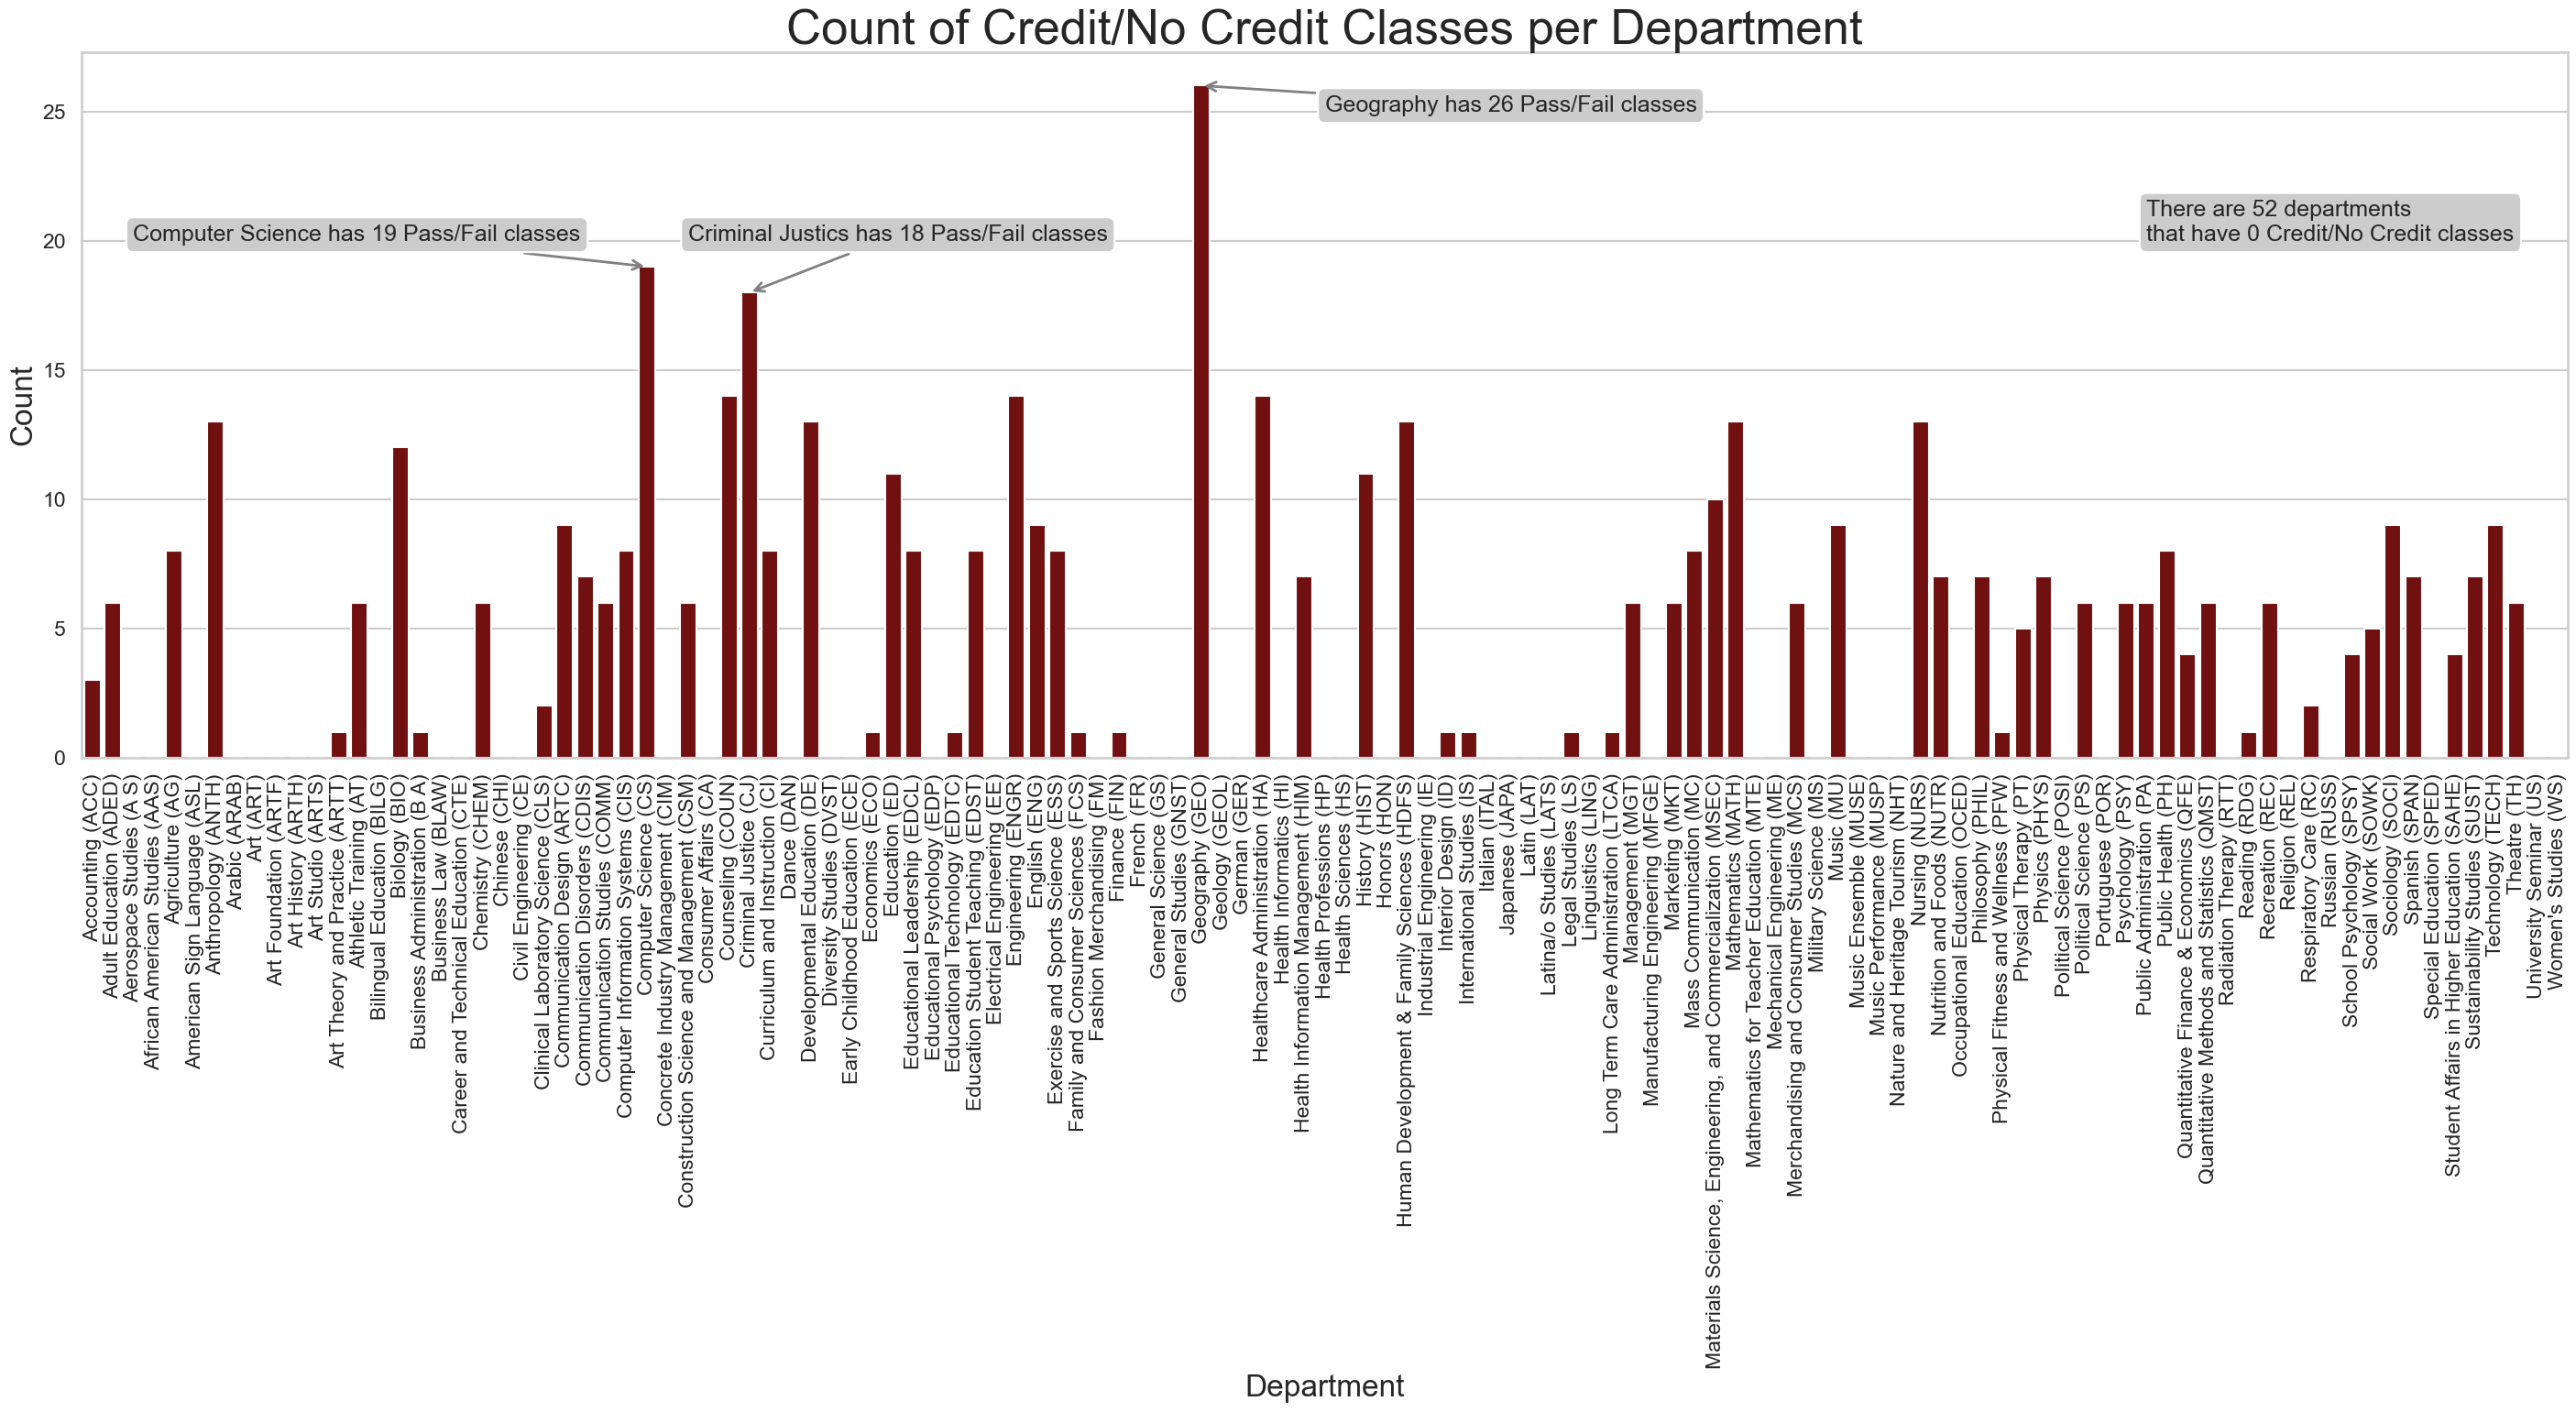

In [25]:
plt.figure(figsize=(35,10))
ax = sns.barplot(x=passFail['Department'],y=passFail['Count of Credit/No Credit Classes'], color="maroon")

ax.annotate("Geography has 26 Pass/Fail classes", xy=(54, 26), xytext=(60, 25), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Computer Science has 19 Pass/Fail classes", xy=(27, 19), xytext=(2, 20), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Criminal Justics has 18 Pass/Fail classes", xy=(32, 18), xytext=(29, 20), fontsize=18,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("There are 52 departments\nthat have 0 Credit/No Credit classes",xy=(110,20), xytext=(100, 20), fontsize=18,
            bbox=dict(boxstyle="round", fc="0.8"))

plt.title("Count of Credit/No Credit Classes per Department", fontsize=38)
plt.xticks(rotation=90)
plt.xlabel("Department",fontsize=24)
plt.ylabel("Count",fontsize=24)
plt.savefig("Count_CreditNoCredit.pdf", bbox_inches='tight')

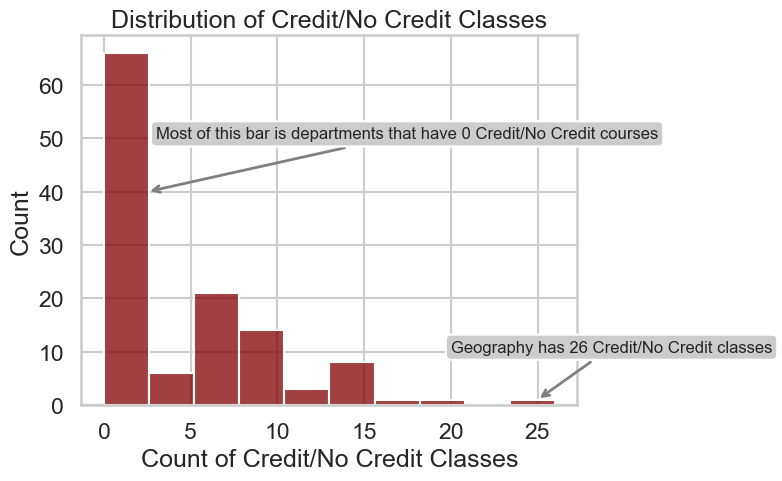

In [26]:
ax = sns.histplot(x=passFail['Count of Credit/No Credit Classes'], color="maroon")
ax.annotate("Geography has 26 Credit/No Credit classes", xy=(25, 1), xytext=(20, 10), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
ax.annotate("Most of this bar is departments that have 0 Credit/No Credit courses", xy=(2.5, 40), xytext=(3, 50), fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox=dict(boxstyle="round", fc="0.8"))
plt.title("Distribution of Credit/No Credit Classes")
plt.savefig("HistPlot_CreditNoCredit.pdf", bbox_inches='tight')

<AxesSubplot: >

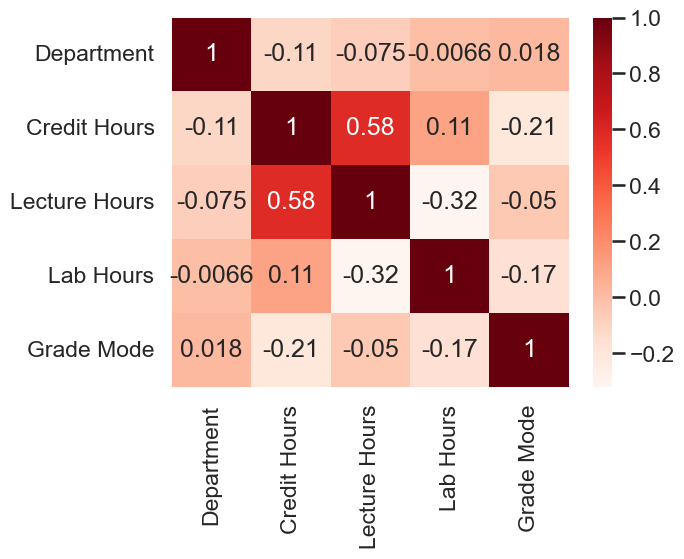

In [27]:
#Correlation between department and lab hours?
#to find correlation, departments would need to be given a numerical val
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
d['Department'] = le.fit_transform(d['Department'])
d['Grade Mode'] = le.fit_transform(d['Grade Mode'])

sns.heatmap(d.corr(), cmap='Reds', annot=True)
